### Importing Libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Loading the Data

In [2]:
#train_dir = 'C:\\Users\\rppin\\OneDrive\\Ambiente de Trabalho\\APROF\\mei-approf\\dataset\\raw\\train\\'
#test_dir= 'C:\\Users\\rppin\\OneDrive\\Ambiente de Trabalho\\APROF\\mei-approf\\dataset\\raw\\test\\'
#val_dir = 'C:\\Users\\rppin\\OneDrive\\Ambiente de Trabalho\\APROF\\mei-approf\\dataset\\raw\\valid\\'

In [5]:
train_dir = 'data/train'
test_dir = 'data/test'
val_dir = 'data/valid'

#classes to be used
classes = ['football', 'formula 1 racing', 'nascar racing', 'baseball', 'hockey', 'basketball',
           'olympic wrestling', 'rugby', 'canoe slalom', 'roller derby', 'high jump',
           'rollerblade racing', 'field hockey', 'figure skating women', 'golf', 'polo',
           'rings', 'swimming', 'uneven bars', 'figure skating pairs']

#### Create an ImageDataGenerator for Training / Validating and Testing data

In [6]:
# Data generators
train_datagen = ImageDataGenerator(
    zoom_range=0.4,
    width_shift_range=0.3,
    height_shift_range=0.3,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    classes=classes
)

val_datagen = ImageDataGenerator()

# Data loaders
train_dg = train_datagen.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    seed=42)

Found 13492 images belonging to 100 classes.


In [9]:
validation_dg = val_datagen.flow_from_directory(
    val_dir,
    class_mode="categorical",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
    seed=42)

Found 500 images belonging to 100 classes.


In [8]:
testing_dg = val_datagen.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
    seed=42)

Found 500 images belonging to 100 classes.


#### Use EfficientNetB0 Model

In [6]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

# Load the EfficientNetB0 model pre-trained on ImageNet
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

# Fine-tune some layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation="softmax")(x)  # Adjust output size for your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [7]:
# Compile the model
opt = Adam(learning_rate=0.0001)  # Adjust learning rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(
    train_dg,
    epochs=20,
    validation_data=validation_dg,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min')
    ])

Epoch 1/20


c:\Users\rppin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.1236 - loss: 2.9282 - val_accuracy: 0.5500 - val_loss: 1.9755 - learning_rate: 1.0000e-04
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.4840 - loss: 1.8947 - val_accuracy: 0.7800 - val_loss: 0.9272 - learning_rate: 1.0000e-04
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.7075 - loss: 1.0964 - val_accuracy: 0.8700 - val_loss: 0.4440 - learning_rate: 1.0000e-04
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.7876 - loss: 0.7351 - val_accuracy: 0.9400 - val_loss: 0.2372 - learning_rate: 1.0000e-04
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8514 - loss: 0.5356 - val_accuracy: 0.9700 - val_loss: 0.1389 - learning_rate: 1.0000e-04
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.8710 - loss: 0.4294 - val_accuracy: 0.9600 - val_loss: 0.1129 - learning_rate: 1.0000e-04
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.90

# Plotting Our Metrics 

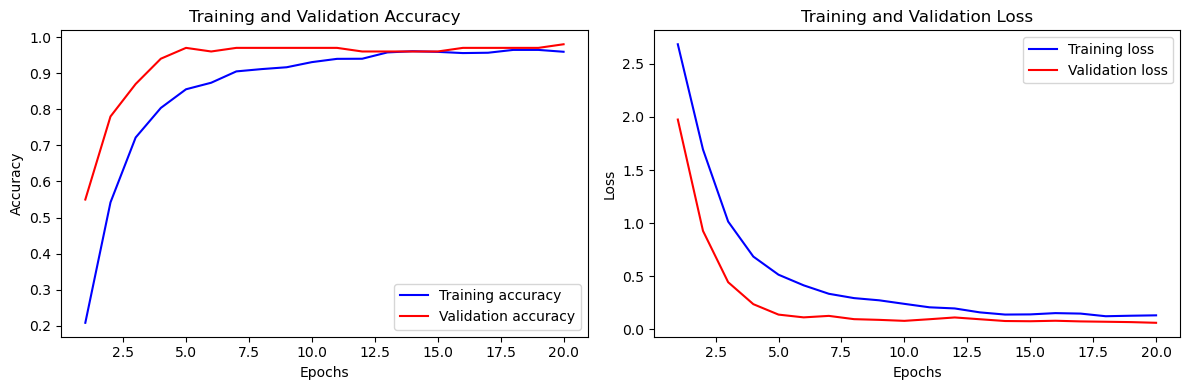

In [9]:
# Plotting metrics
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluating the model's performance on the test dataset.

In [10]:
# Evaluate the model on the test dataset
predictions = model.evaluate(testing_dg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 1.0000 - loss: 0.0187


In [11]:
# Get true labels
true_labels = testing_dg.classes

# Use the model to predict the classes
predicted_labels = np.argmax(model.predict(testing_dg), axis=1)

# Display classification report
print("Classification Report:\n",
      classification_report(true_labels, predicted_labels, target_names=testing_dg.class_indices.keys()))

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 793ms/step
Classification Report:
                       precision    recall  f1-score   support

            baseball       1.00      1.00      1.00         5
          basketball       1.00      1.00      1.00         5
        canoe slamon       1.00      1.00      1.00         5
        field hockey       1.00      1.00      1.00         5
figure skating pairs       1.00      1.00      1.00         5
figure skating women       1.00      1.00      1.00         5
            football       1.00      1.00      1.00         5
    formula 1 racing       1.00      1.00      1.00         5
                golf       1.00      1.00      1.00         5
           high jump       1.00      1.00      1.00         5
              hockey       1.00      1.00      1.00         5
       nascar racing       1.00      1.00      1.00         5
   olympic wrestling       1.00      1.00      1.00         5
                polo       1.00      1.00      1.00         5
      